In [12]:
using Revise
using LinearAlgebra
using Statistics
using QROMP
using Test
using Plots
using ElasticArrays

In [67]:
ψ = randn(5000, 100)
u = randn(5000)
m, n = size(ψ)
ctrue = ψ\u

idxls, cls, ϵls = lsomp(ψ, u; invert = true, verbose = true, ϵrel = eps())
idxqr, cqr, ϵqr = qromp(ψ, u; invert = true, verbose = true, ϵrel = eps())
idxpivot, cpivot, ϵpivot = pivotedqr(ψ, u; invert = true, verbose = true, ϵrel = eps())

# Test LS OMP
idxgreedy, cgreedy, ϵgreedy = greedysolver("lsomp", ψ, u; invert = true, verbose = true, ϵrel = eps())

@test norm(idxls - idxgreedy)<1e-14
@test norm(cls - cgreedy)<1e-14
@test norm(ϵls - ϵgreedy)<1e-14

# Test QR OMP
idxgreedy, cgreedy, ϵgreedy = greedysolver("qromp", ψ, u; invert = true, verbose = true, ϵrel = eps())

@test norm(idxqr - idxgreedy)<1e-14
@test norm(cqr - cgreedy)<1e-14
@test norm(ϵqr - ϵgreedy)<1e-14

# Test Pivoted QR
idxgreedy, cgreedy, ϵgreedy = greedysolver("pivotedqr", ψ, u; invert = true, verbose = true, ϵrel = eps())

@test norm(idxpivot - idxgreedy)<1e-14
@test norm(cpivot - cgreedy)<1e-14
@test norm(ϵpivot - ϵgreedy)<1e-14

Test Passed

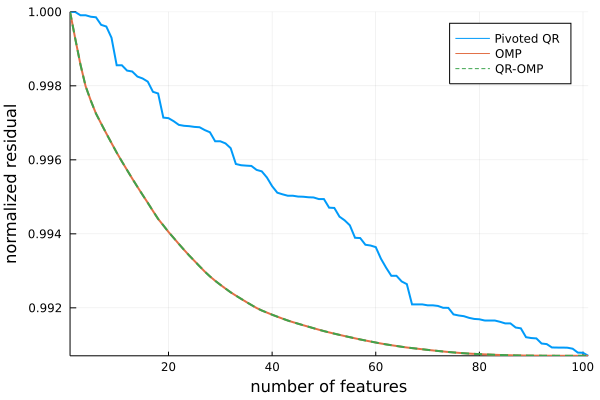

In [68]:
plt = plot(ϵpivot./norm(u), linewidth = 2, label = "Pivoted QR", 
    xlim = (-Inf, Inf), xlabel = "number of features",
    ylim = (-Inf, Inf), ylabel = "normalized residual")
plot!(ϵls./norm(u), linewidth = 2, label = "OMP")
plot!(ϵqr./norm(u), linewidth = 2, label = "QR-OMP", linestyle = :dash)
# savefig("greedy_test.pdf")
plt